In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
from matplotlib import pyplot as plt

# from sklearn.cluster import KMeans
import PsnrSnr as p
import kmeansAlgo

<IPython.core.display.Javascript object>

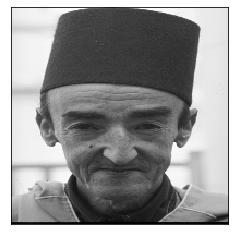

<IPython.core.display.Javascript object>

In [3]:
img = cv.imread("189080.jpg", 0)
size=200
img = cv.resize(img, dsize=(size, size)) 
width=img.shape[0]
height=img.shape[1]

plt.imshow(img, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()


In [4]:
i = 0
j = 0
luv = []

for h in range(int(width / 2)):
    j = 0
    for k in range(int(height / 2)):
        luv.append([img[i, j], img[i + 1, j], img[i, j + 1], img[i + 1, j + 1]])
        j = j + 2
    i = i + 2

<IPython.core.display.Javascript object>

In [5]:
import time as t

cluster = 36

clusterssize = [cluster]  # 2, 3, 4, 5, 6, 7, 8, 9,
timearray = []
psnrarray = []
segementedImg = []

<IPython.core.display.Javascript object>

In [6]:
for i in range(10):

    start = t.time()
    randomnumber = np.random.randint(0, 100)
    print(randomnumber)

    kmeans = kmeansAlgo.Kmeans(
        n_clusters=cluster, random_state=randomnumber, max_iter=50
    )
    kmeans.fit(np.array(luv))

    timearray.append(t.time() - start)

    segementedImg.append(kmeans.labels)

    pic2show = kmeans.centroids

    #     print("timearray", timearray)
    lables = np.array(kmeans.labels)

    clustercenters = (kmeans.centroids).reshape(cluster, 4)
    centersp = (kmeans.centroids).reshape(cluster, 4)
    centersp.shape

    finalval = []
    for i in range(lables.shape[0]):
        finalval.append(centersp[lables[i]])

    finalval = np.array(finalval).reshape(int(width / 2), int(height / 2), 4)

    temp = np.zeros((width, height))
    i = 0
    j = 0
    for h in range(int(width / 2)):
        j = 0
        for k in range(int(height / 2)):
            val = finalval

            temp[i, j] = val[h][k][0]
            temp[i + 1, j] = val[h][k][1]
            temp[i, j + 1] = val[h][k][2]
            temp[i + 1, j + 1] = val[h][k][3]

            j = j + 2
        i = i + 2

    psnr = p.psnr(np.array(img).astype(int), np.array(temp).astype(int))
    psnrarray.append(psnr)
    print("psnr", psnrarray)

28


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


psnr [10.612653717277317]
93
psnr [10.612653717277317, 30.9893706653419]
83
psnr [10.612653717277317, 30.9893706653419, 31.266922441313724]
28
psnr [10.612653717277317, 30.9893706653419, 31.266922441313724, 31.281474937671216]
58
psnr [10.612653717277317, 30.9893706653419, 31.266922441313724, 31.281474937671216, 31.00103486557955]
49
psnr [10.612653717277317, 30.9893706653419, 31.266922441313724, 31.281474937671216, 31.00103486557955, 10.612653717277317]
31
psnr [10.612653717277317, 30.9893706653419, 31.266922441313724, 31.281474937671216, 31.00103486557955, 10.612653717277317, 31.001574970268358]
59
psnr [10.612653717277317, 30.9893706653419, 31.266922441313724, 31.281474937671216, 31.00103486557955, 10.612653717277317, 31.001574970268358, 30.84622065852088]
52
psnr [10.612653717277317, 30.9893706653419, 31.266922441313724, 31.281474937671216, 31.00103486557955, 10.612653717277317, 31.001574970268358, 30.84622065852088, 31.1481712281665]
96
psnr [10.612653717277317, 30.9893706653419, 

<IPython.core.display.Javascript object>

In [7]:
print("PSNR", np.mean(psnrarray), "+/- \n", np.std(psnrarray))
print("timearray", np.mean(timearray), "+/- \n", np.std(timearray))

PSNR 26.991722907306915 +/- 
 8.190517786801667
timearray 0.5351238012313843 +/- 
 0.028045099150251915


<IPython.core.display.Javascript object>